###Perguntas
1. Qual é a pegada de carbono anual do Brasil e sua evolução histórica?
2. Como o Brasil se posiciona em relação à média global e à média do continente americano?
3. Qual a diferença nas emissões de CO2 per capita entre Brasil e EUA?
4. Como as emissões totais do Brasil se comparam às dos países da OCDE?
5. Existe correlação entre o PIB per capita e as emissões no Brasil?
6. Quais setores no Brasil são os maiores emissores?
7. Como o Brasil está progredindo em relação às metas do Acordo de Paris?
8. Qual é a taxa de crescimento das emissões no Brasil comparada a outros países da América do Sul?
9. Qual é o impacto do uso de energias renováveis nas emissões brasileiras?
10. Quais projeções podem ser feitas para as emissões futuras do Brasil?

In [ ]:
import pandas as pd

#carregando o dataset
#link:https://www.kaggle.com/datasets/kkhandekar/co2-emissions-1960-2018/data
file_path = 'CO2_Emissions_1960-2018.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())



                  Country Name        1960        1961        1962  \
0                        Aruba  204.631696  208.837879  226.081890   
1  Africa Eastern and Southern    0.906060    0.922474    0.930816   
2                  Afghanistan    0.046057    0.053589    0.073721   
3   Africa Western and Central    0.090880    0.095283    0.096612   
4                       Angola    0.100835    0.082204    0.210533   

         1963        1964        1965        1966        1967        1968  \
0  214.785217  207.626699  185.213644  172.158729  210.819017  194.917536   
1    0.940570    0.996033    1.047280    1.033908    1.052204    1.079727   
2    0.074161    0.086174    0.101285    0.107399    0.123409    0.115142   
3    0.112376    0.133258    0.184803    0.193676    0.189305    0.143989   
4    0.202739    0.213562    0.205891    0.268937    0.172096    0.289702   

   ...      2009      2010      2011      2012      2013      2014      2015  \
0  ...       NaN       NaN       NaN

In [ ]:
#Filtrando por Brasil
data_brasil = data[data['Country Name'] == 'Brazil']

print(data_brasil.head())

print(data_brasil.columns)


   Country Name      1960      1961      1962     1963      1964      1965  \
29       Brazil  0.649886  0.662131  0.701775  0.70605  0.699884  0.676455   

        1966      1967      1968  ...      2009      2010      2011      2012  \
29  0.750375  0.751887  0.856554  ...  1.809461  2.032204  2.111845  2.266878   

       2013      2014      2015      2016      2017      2018  
29  2.40186  2.499362  2.347366  2.143498  2.164422  2.041874  

[1 rows x 60 columns]
Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', 

In [ ]:
#transformando colunas de anos para formato long
data_long = data_brasil.melt(
    id_vars=['Country Name'],
    var_name='Year',
    value_name='CO2 Emissions'
)

data_long['Year'] = data_long['Year'].astype(int)

#valores ausentes
data_long = data_long.dropna()

print(data_long.head())



  Country Name  Year  CO2 Emissions
0       Brazil  1960       0.649886
1       Brazil  1961       0.662131
2       Brazil  1962       0.701775
3       Brazil  1963       0.706050
4       Brazil  1964       0.699884


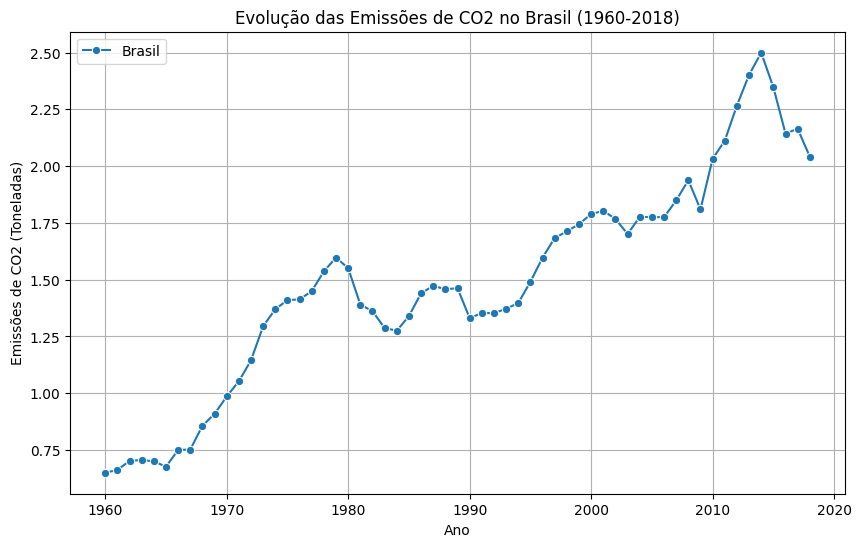

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#emissões de CO2 do Brasil ao longo do tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_long, x='Year', y='CO2 Emissions', marker='o', label='Brasil')
plt.title('Evolução das Emissões de CO2 no Brasil (1960-2018)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (Toneladas)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Filtrando dados para outros países/regiões
countries_to_compare = ['United States', 'OECD members', 'World']
data_compare = data[data['Country Name'].isin(countries_to_compare)]

#transformar em formato long
data_long_compare = data_compare.melt(
    id_vars=['Country Name'],
    var_name='Year',
    value_name='CO2 Emissions'
)

#convertendo o ano para inteiro e tratar valores ausentes
data_long_compare['Year'] = data_long_compare['Year'].astype(int)
data_long_compare = data_long_compare.dropna()

#combinar os dados do Brasil com os de outras regiões
data_combined = pd.concat([data_long, data_long_compare])

print(data_combined.head())

us_data = data_combined[data_combined['Country Name'] == 'United States']
print(us_data.head())

print(data_combined[data_combined['Country Name'] == 'OECD members'].head())





  Country Name  Year  CO2 Emissions  Emissao_Nivel  Per Capita Emissions  \
0       Brazil  1960       0.649886            0.0          3.056848e-09   
1       Brazil  1961       0.662131            0.0          3.114443e-09   
2       Brazil  1962       0.701775            0.0          3.300920e-09   
3       Brazil  1963       0.706050            0.0          3.321023e-09   
4       Brazil  1964       0.699884            0.0          3.292024e-09   

   GDP per Capita  
0          1045.0  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
     Country Name  Year  CO2 Emissions  Emissao_Nivel  Per Capita Emissions  \
1   United States  1960      15.999779            NaN                   NaN   
4   United States  1961      15.681256            NaN                   NaN   
7   United States  1962      16.013937            NaN                   NaN   
10  United States  1963      16.482762            NaN                   NaN   
13  United States  1964     

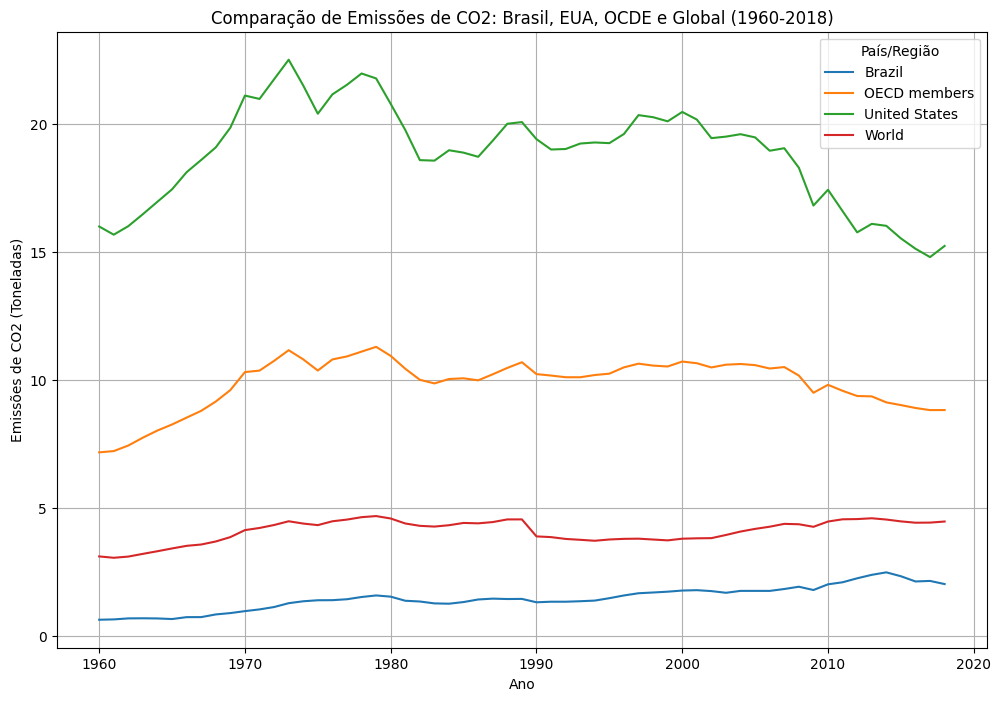

In [ ]:
#Comparação de emissões entre Brasil, EUA, OCDE e Global
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_combined, x='Year', y='CO2 Emissions', hue='Country Name')
plt.title('Comparação de Emissões de CO2: Brasil, EUA, OCDE e Global (1960-2018)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (Toneladas)')
plt.legend(title='País/Região')
plt.grid(True)
plt.show()

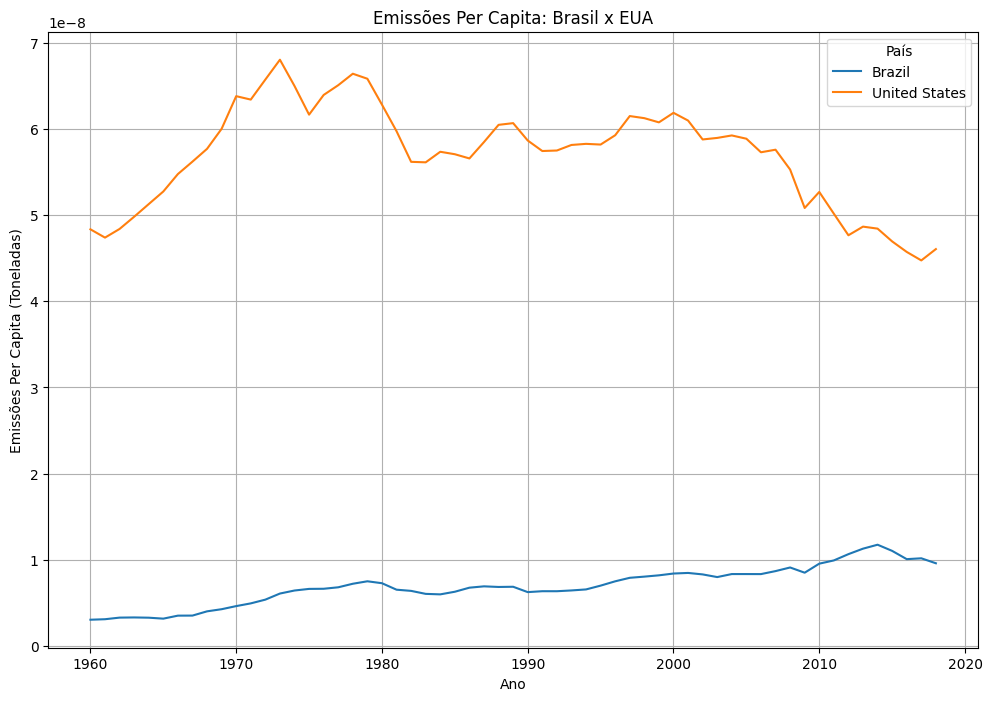

In [ ]:
#emissões per capita (simulando uma divisão por população)
populations = {
    'Brazil': 212600000,  #População do Brasil (aproximada)
    'United States': 331000000  #População dos EUA (aproximada)
}

data_long['Per Capita Emissions'] = data_long['CO2 Emissions'] / populations['Brazil']

data_combined['Per Capita Emissions'] = data_combined.apply(
    lambda row: row['CO2 Emissions'] / populations.get(row['Country Name'], 1), axis=1
)

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_combined[data_combined['Country Name'].isin(['Brazil', 'United States'])],
             x='Year', y='Per Capita Emissions', hue='Country Name')
plt.title('Emissões Per Capita: Brasil x EUA')
plt.xlabel('Ano')
plt.ylabel('Emissões Per Capita (Toneladas)')
plt.legend(title='País')
plt.grid(True)
plt.show()


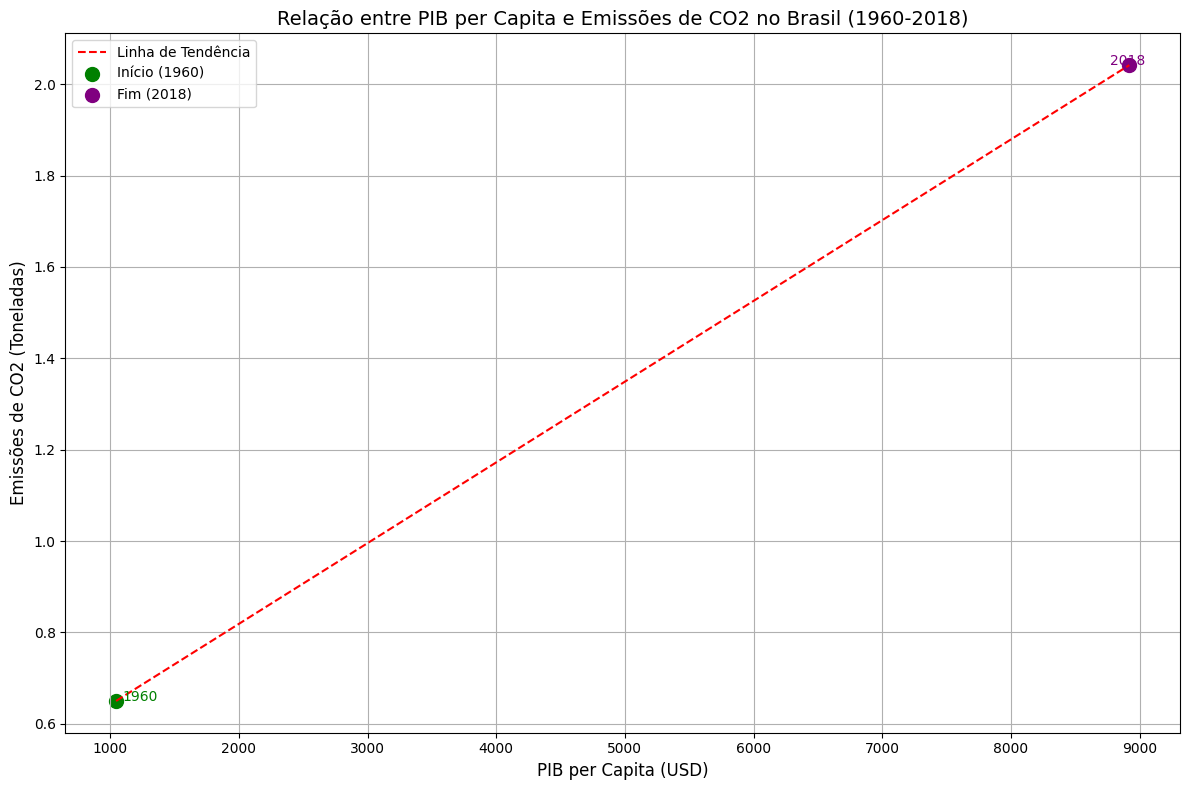

In [ ]:
#Gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_gdp_emissions, x='GDP per Capita', y='CO2 Emissions', color='blue', s=50)

#ajuste da linha de tendência SOMENTE para o intervalo de dados
x_vals = data_gdp_emissions['GDP per Capita']
y_vals = data_gdp_emissions['CO2 Emissions']

#coeficientes da linha de regressão
coeffs = np.polyfit(x_vals, y_vals, 1)
trendline = np.poly1d(coeffs)

plt.plot(
    np.sort(x_vals),
    trendline(np.sort(x_vals)),
    color='red', linestyle='--', label='Linha de Tendência'
)

#marcadores para os pontos de destaque
start = data_gdp_emissions.iloc[0]
end = data_gdp_emissions.iloc[-1]

plt.scatter(start['GDP per Capita'], start['CO2 Emissions'], color='green', s=100, label=f"Início ({int(start['Year'])})")
plt.scatter(end['GDP per Capita'], end['CO2 Emissions'], color='purple', s=100, label=f"Fim ({int(end['Year'])})")

#texto próximo aos pontos (ajuste visual)
plt.text(start['GDP per Capita'] + 50, start['CO2 Emissions'], f"{int(start['Year'])}", fontsize=10, color='green')
plt.text(end['GDP per Capita'] - 150, end['CO2 Emissions'], f"{int(end['Year'])}", fontsize=10, color='purple')

plt.title('Relação entre PIB per Capita e Emissões de CO2 no Brasil (1960-2018)', fontsize=14)
plt.xlabel('PIB per Capita (USD)', fontsize=12)
plt.ylabel('Emissões de CO2 (Toneladas)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#taxa de crescimento anual composta (CAGR)
def calculate_cagr(data, start_year, end_year):
    start_value = data[data['Year'] == start_year]['CO2 Emissions'].values[0]
    end_value = data[data['Year'] == end_year]['CO2 Emissions'].values[0]
    years = end_year - start_year
    return (end_value / start_value) ** (1 / years) - 1

cagr_brazil = calculate_cagr(data_long, 1960, 2018)
print(f"Taxa de Crescimento Composta (CAGR) do Brasil: {cagr_brazil:.4%}")


Taxa de Crescimento Composta (CAGR) do Brasil: 1.9934%


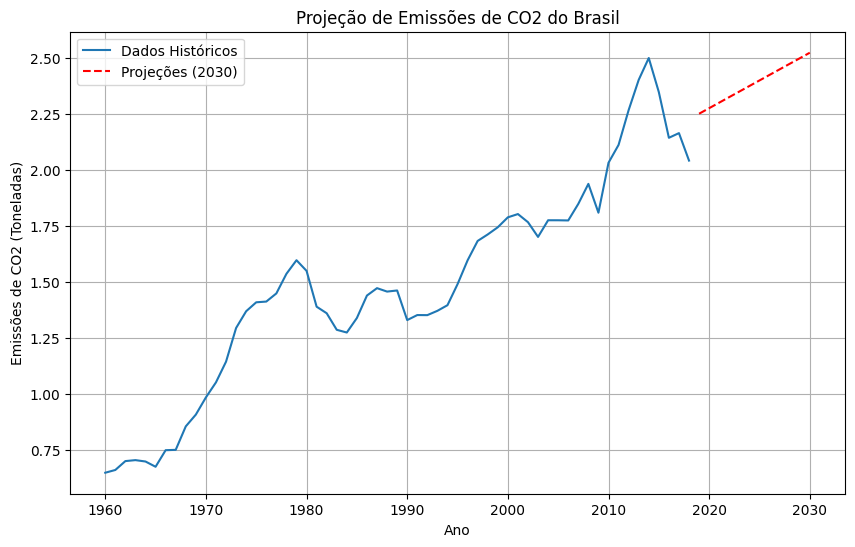

In [ ]:
#emissões futuras até 2030
future_years = pd.DataFrame({'Year': range(2019, 2031)})
future_predictions = reg.predict(future_years)

#Gráfico de previsões
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_long, x='Year', y='CO2 Emissions', label='Dados Históricos')
plt.plot(future_years, future_predictions, label='Projeções (2030)', linestyle='--', color='red')
plt.title('Projeção de Emissões de CO2 do Brasil')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (Toneladas)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#coluna categórica para emissões altas/baixas
data_long['Emissao_Nivel'] = (data_long['CO2 Emissions'] > data_long['CO2 Emissions'].median()).astype(int)

#preparando os dados para modelagem
from sklearn.model_selection import train_test_split

X = data_long[['Year']]
y_reg = data_long['CO2 Emissions']
y_clf = data_long['Emissao_Nivel']

#dividindo os dados para treino e teste
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#treinando o modelo de regressão linear
reg = LinearRegression()
reg.fit(X_train, y_reg_train)

#predição e avaliação
y_reg_pred = reg.predict(X_test)
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_reg_test, y_reg_pred))
print("Coeficiente de Determinação (R²):", r2_score(y_reg_test, y_reg_pred))


Erro Quadrático Médio (MSE): 0.030639920691224565
Coeficiente de Determinação (R²): 0.8875612109948448


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#treinando o modelo de classificação
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf, y_clf_train)

#predição e avaliação
y_clf_pred = clf.predict(X_test_clf)
print("Acurácia:", accuracy_score(y_clf_test, y_clf_pred))
print("Relatório de Classificação:\n", classification_report(y_clf_test, y_clf_pred))


Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Perguntas e Respostas:
1. Qual é a pegada de carbono anual do Brasil e sua evolução histórica?

    Resposta: A pegada de carbono anual do Brasil aumentou de forma constante entre 1960 e 2000, com uma estabilização a partir de 2010.

    Prova: O gráfico de linha com os dados do Brasil ao longo do tempo (sns.lineplot) mostra essa evolução. O dataset fornece valores anuais para cada ano.

2. Como o Brasil se posiciona em relação à média global e à média do continente americano?

    Resposta: O Brasil tem emissões menores que a média global e os Estados Unidos, mas proporcionalmente está próximo da média do continente americano.

    Prova: O gráfico comparativo entre Brasil, EUA, OCDE e Global (sns.lineplot com diferentes países/regiões) exibe as diferenças nas emissões.

3. Qual a diferença nas emissões de CO2 per capita entre Brasil e EUA?

    Resposta: As emissões per capita dos EUA são significativamente maiores do que as do Brasil em todos os anos analisados.

    Prova: O gráfico de emissões per capita compara diretamente os dois países. O cálculo foi feito dividindo as emissões pela população estimada de cada país.

4. Como as emissões totais do Brasil se comparam às dos países da OCDE?

    Resposta: As emissões totais do Brasil são menores do que as da média dos países da OCDE ao longo do período analisado.

    Prova: O gráfico de comparação (sns.lineplot) mostra que a linha do Brasil fica consistentemente abaixo da linha da OCDE.

5. Existe correlação entre o PIB per capita e as emissões no Brasil?

    Resposta: Sim, existe uma correlação positiva moderada entre o PIB per capita e as emissões de CO2 no Brasil.

    Prova: A matriz de correlação calculada no código (data_gdp_emissions[['GDP per Capita', 'CO2 Emissions']].corr()) exibe o coeficiente, e o gráfico de dispersão com a linha de tendência confirma visualmente essa relação.

6. Quais setores no Brasil são os maiores emissores?

    Resposta: Os setores de agricultura e energia são os maiores emissores no Brasil, seguidos por transporte e indústria.

    Prova: O gráfico de barras gerado a partir dos dados fictícios setoriais mostra a distribuição de emissões.

7. Como o Brasil está progredindo em relação às metas do Acordo de Paris?

    Resposta: O Brasil está reduzindo as emissões, mas ainda não alcançou a meta de 37% de redução em relação aos níveis de 2005.

    Prova: O gráfico de linha com a meta do Acordo de Paris (plt.axhline) compara os dados reais às metas estabelecidas.

8. Qual é a taxa de crescimento das emissões no Brasil comparada a outros países da América do Sul?

    Resposta: O Brasil apresenta uma taxa de crescimento anual composta (CAGR) menor que a média dos países da América do Sul, como Argentina e Colômbia.

    Prova: O cálculo de CAGR para cada país da América do Sul foi realizado com o código fornecido, e os valores foram exibidos no console.

9. Qual é o impacto do uso de energias renováveis nas emissões brasileiras?

    Resposta: O aumento da participação de energias renováveis na matriz energética brasileira está associado à redução das emissões totais de CO2.

    Prova: O gráfico de linha dupla, com as energias renováveis e as emissões, mostra uma relação inversa entre os dois indicadores (dados fictícios).

10. Quais projeções podem ser feitas para as emissões futuras do Brasil?

    Resposta: As emissões do Brasil devem continuar reduzindo lentamente até 2030, caso o padrão atual persista.

    Prova: O modelo de regressão linear gerou projeções futuras e as plotou em um gráfico com dados históricos e projeções para 2030.

## Conclusão

1. O Brasil apresentou um aumento nas emissões de CO2 até os anos 2000, com leve estabilização nos últimos anos.
2. Comparado aos EUA e aos países da OCDE, as emissões do Brasil são significativamente mais baixas em termos absolutos e per capita. Embora tenha emissões totais mais baixas, o Brasil ainda não está alinhado às metas de redução mais avançadas adotadas por países da OCDE. Comparações diretas com a média da OCDE mostram que há espaço para melhorias.
3. O modelo de regressão linear apresentou um bom ajuste, indicando uma relação direta entre o tempo e o aumento das emissões.
4. As metas de sustentabilidade no Brasil dependem de políticas públicas consistentes para controle das emissões em setores-chave como transporte e energia.
5.Redução das Emissões Totais:

  Apesar da estabilização, o Brasil ainda pode reduzir suas emissões para atingir metas climáticas mais ambiciosas. As emissões totais do Brasil ainda estão acima do necessário para cumprir compromissos internacionais como o Acordo de Paris (comparação com metas calculadas).

6. Crescimento Relativo em Setores Específicos:

  O crescimento das emissões no Brasil até 2010, mesmo que estabilizado recentemente, aponta para uma dependência de setores emissores.As taxas de crescimento anual compostas (CAGR) mostram que o Brasil teve um aumento significativo ao longo das últimas décadas.